In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
%load_ext watermark

In [3]:
%watermark

Last updated: 2021-12-03T10:51:19.397916+09:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [4]:
%watermark -d -t

In [5]:
%watermark -p np, scipy, sklearn, pandas, matplotlib

UsageError: unrecognized arguments: scipy, sklearn, pandas, matplotlib


In [6]:
# 회귀분석 : 1.전기 생산량과 소비량
# 독립변수(전기생산량), 종속변수(전기소비량)
# 독립변수가 1개이므로 단순회기분석(선형회귀분석) 사용
# 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다.
# 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다.
# 월별 전기 생산금액(억원)

x =[3.52,2.58,3.31,4.07,4.62,3.98,4.29, 4.83, 3.71, 4.61, 3.90,3.20]

# 월별 전기 사용량(백만 kwh)
y =[2.48,2.27,2.47,2.77,2.98,3.05,3.18, 3.46, 3.03, 3.25, 2.67,2.53]

#slope(기울기), 절편(intercept),
#rvalue(상관계수, 1을 기준으로 얼마나 이 수치가 믿을만 한가를 판단), pvalue(예측 불확실성으 정도를 나타내는 값)
#에러의 표준편차(stderr) 실제값과 예측값의 평균적인 차이
# linregress(독립변수, 종속변수) 선형회귀분석

result = stats.linregress(x,y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

Text(0, 0.5, '전기사용량')

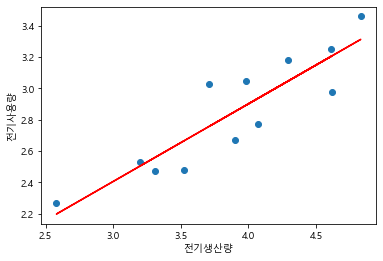

In [7]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)
x1 = np.array(x)

plt.scatter(x,y)

plt.plot(x1, slope*x1 + intercept, c='red')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')

In [8]:
4*slope + intercept

2.901994372142104

In [1]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2, alpha):
    mean1, mean2 = mean(data1), mean(data2) #평균
    # 표준오차 계산
    se1, se2 = sem(data1), sem(data2)
    sed = sqrt(se1**2 + se2**2)
    # t통계량 계산
    t_stat = (mean1 - mean2) / sed
    # 자유도 계산
    df = len(data1) + len(data2) - 2
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, p

x=[3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.9, 3.2]
y=[2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

alpha = 0.05
t_stat, p = independent_ttest(x,y, alpha)
print('t=%.3f, p-value=%f' % (t_stat, p))

if p > alpha:
    print('p-value > 0.05, 귀무가설 채택')
else:
    print('p-value < 0.05, 대립가설 채택')


t=4.752, p-value=0.000096
p-value < 0.05, 대립가설 채택


[-8.         -7.83838384 -7.67676768 -7.51515152 -7.35353535]
[3.39767312e-06 4.95353201e-06 7.17671574e-06 1.03327820e-05
 1.47840373e-05]


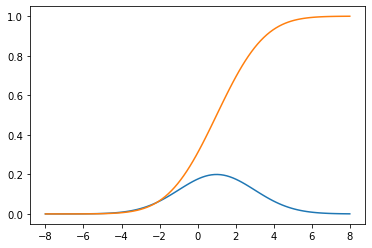

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

xx = np.linspace(-8, 8, 100) #-8에서 8까지 100등분
rv = sp.stats.norm(loc=1, scale=2)
cdf = rv.cdf(xx) #누적함수
pdf = rv.pdf(xx) #확률밀도함수(누적분포함수를 미분)

print(xx[:5])
print(cdf[:5])
plt.plot(xx, pdf)
plt.plot(xx, cdf)
plt.show()

In [3]:
#회귀함수
#사이킷런
from sklearn.datasets import make_regression
#가상의 회귀분석 데이터 생성 함수
#n_features : 독립변수의 개수, bias:y절편
#noise: y의 표준편차
#coef: 회귀계수(기울기) 사용 여부, True이면 w값을 리턴함

X,y,w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10,
    random_state=0, coef=True
)

print(X[:5].flatten()) #2차원 배열을 1차원 배열로 변환
print(y[:5])
print(w)

[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [4]:
import numpy as np

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100 #회귀함수, 기울기*x + 절편

Text(0.5, 1.0, 'regression')

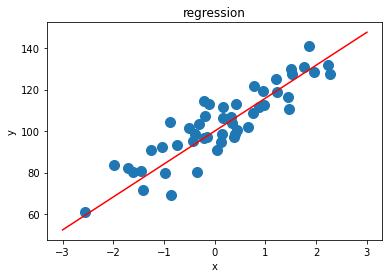

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xx, y0, 'r-')
plt.scatter(X, y, s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('regression')